In [1]:
import pandas as pd
import sys

In [2]:
sys.path.append('../')

In [3]:
from utils import SIR, run
from vaccination_strategy.degree_based_strategy import degree_based_vaccination_strategy

In [4]:
metadata = pd.read_csv('../data/generation/metadata.csv')
# Have to remove the first row as it is headings duplicated
metadata = metadata.iloc[1:, : ]
df = pd.read_csv('../data/generation/contact_network.csv')

In [5]:
df.head()

,Unnamed: 0,timestamp,p1,p2
0,0,1,2,34
1,1,1,100,89
2,2,1,86,105
3,3,1,2,67
4,4,1,61,1


In [6]:
metadata.head()

,id,age,apartment,home,family,office,school
1,1,32,0,-1,0,6,-1
2,2,35,0,-1,1,-1,-1
3,3,65,0,-1,1,-1,-1
4,4,48,0,-1,2,-1,-1
5,5,44,0,-1,2,3,-1


In [7]:
model = SIR(
    metadata=metadata,
    df=df
)

In [8]:
vaccinated = degree_based_vaccination_strategy(model,20,5)

In [9]:
print(vaccinated)

[1, 2, 8, 9, 18, 21, 22, 23, 24, 35, 36, 40, 47, 54, 55, 56, 58, 61, 63, 65, 67, 68, 72, 75, 83, 86, 89, 103, 104, 105, 12, 74, 100]


At day 0
Number of susceptible:  356
Number of infected:  30
Number of recovered:  0
Number of deceased:  0
After 1 day(s) 
Number of susceptible:  338
Number of infected:  48
Number of recovered:  0
Number of deceased:  0
After 2 day(s) 
Number of susceptible:  307
Number of infected:  77
Number of recovered:  1
Number of deceased:  1
After 3 day(s) 
Number of susceptible:  284
Number of infected:  95
Number of recovered:  6
Number of deceased:  1
After 4 day(s) 
Number of susceptible:  248
Number of infected:  126
Number of recovered:  10
Number of deceased:  2
After 5 day(s) 
Number of susceptible:  209
Number of infected:  129
Number of recovered:  45
Number of deceased:  3
After 6 day(s) 
Number of susceptible:  194
Number of infected:  141
Number of recovered:  48
Number of deceased:  3
After 7 day(s) 
Number of susceptible:  175
Number of infected:  153
Number of recovered:  54
Number of deceased:  4
After 8 day(s) 
Number of susceptible:  166
Number of infected:  159
Number of 

{'metrics': {'total_deaths': 22, 'peak_infections': 211},
 'stats': {'susceptible': [356,
   338,
   307,
   284,
   248,
   227,
   194,
   175,
   166,
   144,
   127,
   111,
   98,
   87,
   82,
   78,
   70,
   66,
   64,
   57,
   51,
   46,
   39,
   33,
   31,
   29,
   25,
   20,
   18,
   18,
   18,
   18],
  'infected': [30,
   48,
   77,
   95,
   126,
   144,
   141,
   153,
   159,
   178,
   191,
   200,
   205,
   208,
   207,
   206,
   211,
   207,
   201,
   202,
   204,
   204,
   203,
   201,
   188,
   179,
   174,
   170,
   169,
   158,
   156,
   154],
  'recovered': [0,
   0,
   1,
   6,
   10,
   12,
   48,
   54,
   57,
   60,
   64,
   71,
   79,
   87,
   93,
   97,
   100,
   108,
   115,
   120,
   124,
   128,
   134,
   141,
   153,
   162,
   171,
   178,
   180,
   189,
   191,
   192],
  'deceased': [0,
   0,
   1,
   1,
   2,
   3,
   3,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   5,
   5,
   5,
   6,
   7,
   7,
   8,
   10,
   11,
   14,
 

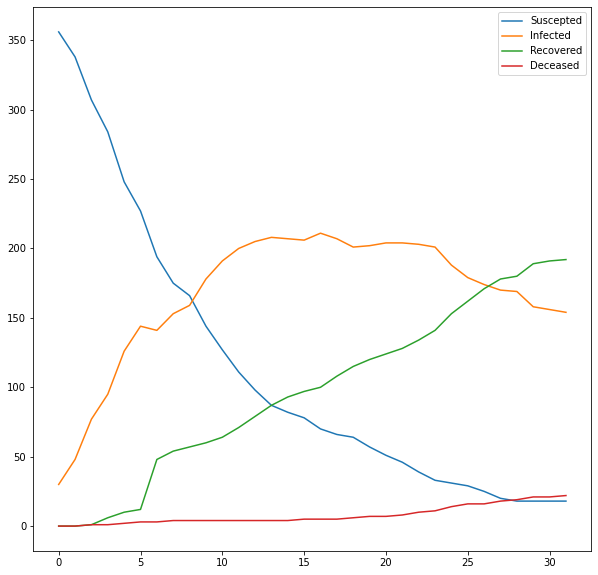

In [10]:
run(model,vaccinated,5)